In [1]:
import os
import sys 
import pandas as pd
from train_models import train_dl_model, LOOK_BACK, PREDICT_N

sys.path.append('../')
from lstm import apply_model, custom_loss_msle, custom_loss_msle_slope

In [2]:
LOOK_BACK

12

In [3]:
PREDICT_N

10

In [4]:
df_macro = pd.read_csv('../macro_saude.csv')

df_macro.head()

,Unnamed: 0,geocode,name_muni,name_region,code_region,name_macro,code_macro,state
0,0,1100015,Alta Floresta D'Oeste,Zona da Mata,11005,Cacoal,1101,RO
1,1,1100023,Ariquemes,Vale do Jamari,11001,Porto Velho,1102,RO
2,2,1100031,Cabixi,Cone Sul,11006,Cacoal,1101,RO
3,3,1100049,Cacoal,Café,11002,Cacoal,1101,RO
4,4,1100056,Cerejeiras,Cone Sul,11006,Cacoal,1101,RO


In [5]:
df_macro.loc[df_macro.state == 'RS']

,Unnamed: 0,geocode,name_muni,name_region,code_region,name_macro,code_macro,state
652,652,4306734,Doutor Maurício Cardoso,Região 14 - Fronteira Noroeste,43014,Missioneira,4312,RS
996,996,4300638,Amaral Ferrador,Região 21 - Sul,43021,Sul,4309,RS
997,997,4300901,Aratiba,Região 16 - Alto Uruguai Gaúcho,43016,Norte,4311,RS
1010,1010,4301057,Arroio do Sal,Região 04 - Belas Praias,43004,Metropolitana,4313,RS
1015,1015,4301107,Arroio dos Ratos,Região 09 - Carbonífera/Costa Doce,43009,Metropolitana,4313,RS
...,...,...,...,...,...,...,...,...
5500,5500,4323200,Victor Graeff,Região 17 - Planalto,43017,Norte,4311,RS
5501,5501,4323358,Vila Lângaro,Região 18 - Araucárias,43018,Norte,4311,RS
5502,5502,4323408,Vila Maria,Região 17 - Planalto,43017,Norte,4311,RS
5503,5503,4323754,Vitória das Missões,Região 11 - Sete Povos das Missões,43011,Missioneira,4312,RS


Compilation Time :  0.0029942989349365234
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 38)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 12, 32)            18176     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 12, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 32)            8320      
                                                                 
 dropout_2 (Dropout)         (None, 12, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                   

241/241 [==============================] - 1s 3ms/step - loss: 0.0080 - accuracy: 0.4108 - mape: 84.1202 - mse: 0.0102 - val_loss: 0.0071 - val_accuracy: 0.4691 - val_mape: 73.0837 - val_mse: 0.0095
Epoch 33/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0067 - accuracy: 0.4149 - mape: 75.3585 - mse: 0.0076 - val_loss: 0.0084 - val_accuracy: 0.4444 - val_mape: 75.6425 - val_mse: 0.0125
Epoch 34/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0083 - accuracy: 0.4274 - mape: 79.4770 - mse: 0.0106 - val_loss: 0.0083 - val_accuracy: 0.4321 - val_mape: 65.1997 - val_mse: 0.0117
Epoch 35/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0079 - accuracy: 0.4191 - mape: 78.9849 - mse: 0.0101 - val_loss: 0.0077 - val_accuracy: 0.4568 - val_mape: 61.9313 - val_mse: 0.0094
Epoch 36/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0083 - accuracy: 0.3859 - mape: 81.2498 - mse: 0.0103 - val_loss: 0.0088 - val_accuracy

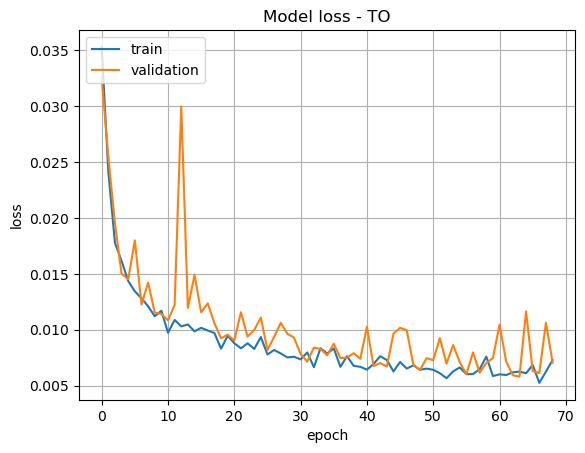

CPU times: user 1min 19s, sys: 7.59 s, total: 1min 26s
Wall time: 57.9 s


In [6]:
%%time 

city = 'TO'

FILENAME_DATA = f'../data/dengue_{city}.csv.gz' 

end_date = '2023-12-31'

loss = 'msle'

train_dl_model(city,loss = loss, doenca = 'dengue', end_date_train = '2021-12-31', hidden = 32, ratio = None , end_date = end_date, plot = True, filename_data = FILENAME_DATA, min_delta = 0.01, label = 't_msle', lr = 0.001, epochs = 200)
    


Compilation Time :  0.0019469261169433594
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12, 38)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 12, 32)            18176     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 12, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 32)            8320      
                                                                 
 dropout_2 (Dropout)         (None, 12, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                 

Epoch 32/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.3237 - mape: 95.8796 - mse: 0.0112 - val_loss: 0.0354 - val_accuracy: 0.3704 - val_mape: 81.1688 - val_mse: 0.0157
Epoch 33/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0217 - accuracy: 0.3693 - mape: 76.8634 - mse: 0.0105 - val_loss: 0.0341 - val_accuracy: 0.3827 - val_mape: 59.0229 - val_mse: 0.0148
Epoch 34/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0205 - accuracy: 0.3983 - mape: 74.9506 - mse: 0.0096 - val_loss: 0.0270 - val_accuracy: 0.3951 - val_mape: 67.5097 - val_mse: 0.0116
Epoch 35/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.3693 - mape: 76.4921 - mse: 0.0099 - val_loss: 0.0214 - val_accuracy: 0.3951 - val_mape: 73.5339 - val_mse: 0.0088
Epoch 36/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.3278 - mape: 78.3504 - mse: 0.0100 - val_loss: 0.0355 -

Epoch 71/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.3527 - mape: 71.7494 - mse: 0.0101 - val_loss: 0.0220 - val_accuracy: 0.3580 - val_mape: 69.0121 - val_mse: 0.0101
Epoch 72/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0185 - accuracy: 0.3195 - mape: 68.7143 - mse: 0.0089 - val_loss: 0.0521 - val_accuracy: 0.1975 - val_mape: 67.0105 - val_mse: 0.0221
Epoch 73/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.2863 - mape: 96.5088 - mse: 0.0094 - val_loss: 0.0191 - val_accuracy: 0.3086 - val_mape: 64.4737 - val_mse: 0.0086
Epoch 74/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.3734 - mape: 73.8557 - mse: 0.0081 - val_loss: 0.0214 - val_accuracy: 0.3580 - val_mape: 94.3054 - val_mse: 0.0093
Epoch 75/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0151 - accuracy: 0.4357 - mape: 77.9290 - mse: 0.0064 - val_loss: 0.0158 -

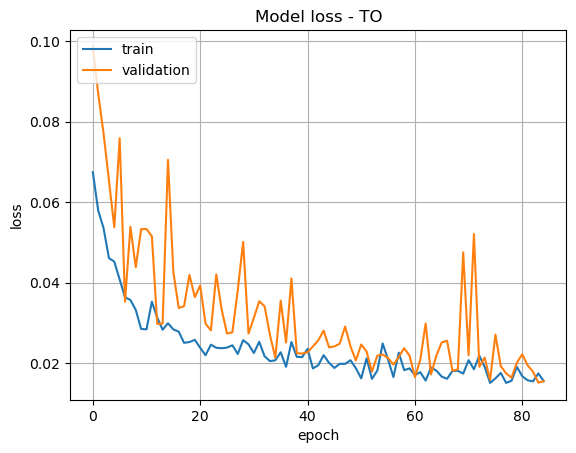

CPU times: user 1min 36s, sys: 8.88 s, total: 1min 45s
Wall time: 1min 10s


In [7]:
%%time 

city = 'TO'

FILENAME_DATA = f'../data/dengue_{city}.csv.gz' 

end_date = '2023-12-31'

loss = custom_loss_msle(p=5)

train_dl_model(city,loss = loss, doenca = 'dengue', end_date_train = '2021-12-31', hidden = 32, ratio = None , end_date = end_date, plot = True, filename_data = FILENAME_DATA, min_delta = 0.01, label = 'cl1_p_5', lr = 0.001, epochs = 200)
    


Compilation Time :  0.0015878677368164062
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12, 38)]          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 12, 32)            18176     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 12, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 32)            8320      
                                                                 
 dropout_2 (Dropout)         (None, 12, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                 

241/241 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.4232 - mape: 73.3558 - mse: 0.0083 - val_loss: 0.0078 - val_accuracy: 0.4198 - val_mape: 73.3869 - val_mse: 0.0107
Epoch 33/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0077 - accuracy: 0.3942 - mape: 74.2792 - mse: 0.0101 - val_loss: 0.0086 - val_accuracy: 0.4074 - val_mape: 83.0107 - val_mse: 0.0118
Epoch 34/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0075 - accuracy: 0.3983 - mape: 83.7181 - mse: 0.0090 - val_loss: 0.0078 - val_accuracy: 0.4691 - val_mape: 52.4085 - val_mse: 0.0109
Epoch 35/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0072 - accuracy: 0.4191 - mape: 73.3587 - mse: 0.0087 - val_loss: 0.0085 - val_accuracy: 0.4198 - val_mape: 87.9899 - val_mse: 0.0116
Epoch 36/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0082 - accuracy: 0.4274 - mape: 88.1976 - mse: 0.0105 - val_loss: 0.0088 - val_accuracy

Epoch 71/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.4108 - mape: 68.2330 - mse: 0.0067 - val_loss: 0.0075 - val_accuracy: 0.3457 - val_mape: 57.2144 - val_mse: 0.0101
Epoch 72/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.4025 - mape: 69.4243 - mse: 0.0068 - val_loss: 0.0058 - val_accuracy: 0.4198 - val_mape: 60.1999 - val_mse: 0.0077
Epoch 73/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0054 - accuracy: 0.4357 - mape: 65.8350 - mse: 0.0066 - val_loss: 0.0063 - val_accuracy: 0.4198 - val_mape: 62.1591 - val_mse: 0.0085
Epoch 74/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.4191 - mape: 69.4756 - mse: 0.0072 - val_loss: 0.0065 - val_accuracy: 0.4198 - val_mape: 68.7228 - val_mse: 0.0087
Epoch 75/200
241/241 [==============================] - 1s 3ms/step - loss: 0.0064 - accuracy: 0.4357 - mape: 70.3531 - mse: 0.0082 - val_loss: 0.0065 -

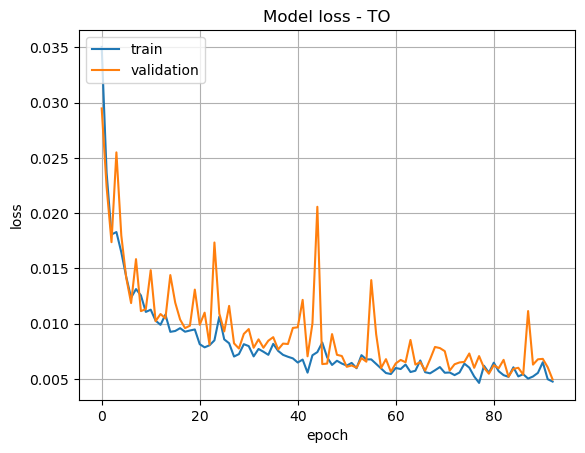

CPU times: user 1min 46s, sys: 10.2 s, total: 1min 56s
Wall time: 1min 17s


In [11]:
%%time 

city = 'TO'

FILENAME_DATA = f'../data/dengue_{city}.csv.gz' 

end_date = '2023-12-31'

loss = custom_loss_msle_slope(p=5, threshold = 10.0)

train_dl_model(city,loss = loss, doenca = 'dengue', end_date_train = '2021-12-31', hidden = 32, ratio = None , end_date = end_date, plot = True, filename_data = FILENAME_DATA, min_delta = 0.01, label = 'cl2_p_5', lr = 0.001, epochs = 200)
    


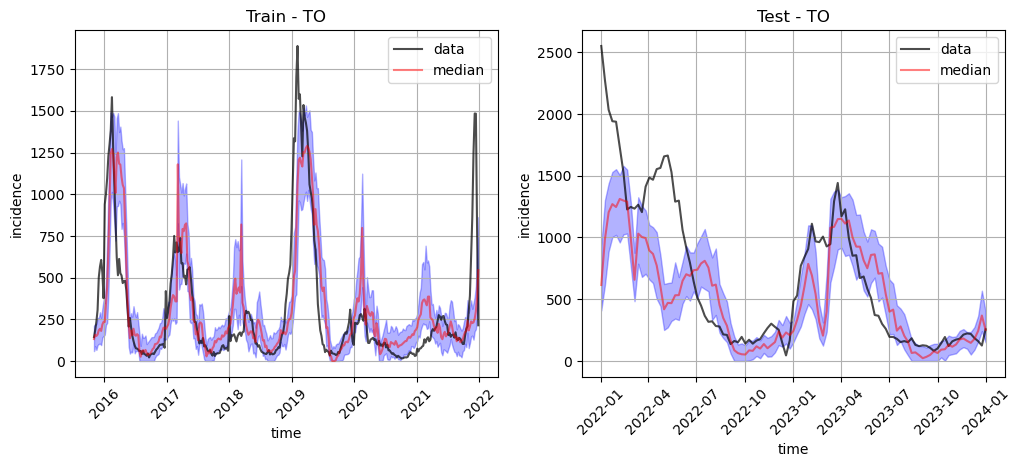

CPU times: user 56.1 s, sys: 3.72 s, total: 59.8 s
Wall time: 42 s


In [9]:
%%time 

metrics1 = apply_model(city, ini_date = '2015-06-01', 
                    end_date = end_date, look_back = LOOK_BACK, end_train_date = '2021-12-31', batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= f'dengue_{city}',
                    model_name = f'trained_{city}_dengue_t_msle', 
                    filename = f'../data/dengue_{city}.csv.gz', plot = True)

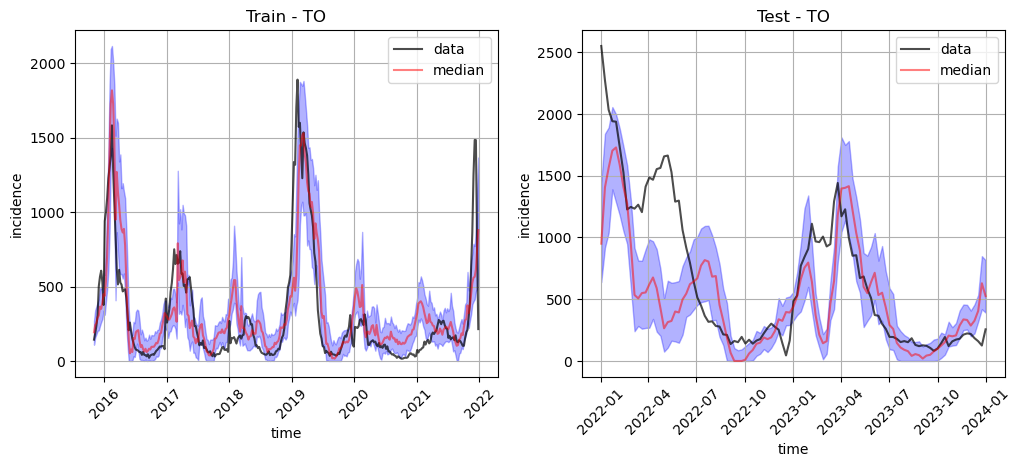

CPU times: user 54.9 s, sys: 3.84 s, total: 58.8 s
Wall time: 41.4 s


In [10]:
%%time 

metrics2 = apply_model(city, ini_date = '2015-06-01', 
                    end_date = end_date, look_back = LOOK_BACK, end_train_date = '2021-12-31', batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= f'dengue_{city}',
                    model_name = f'trained_{city}_dengue_cl1_p_5', 
                    filename = f'../data/dengue_{city}.csv.gz', plot = True)

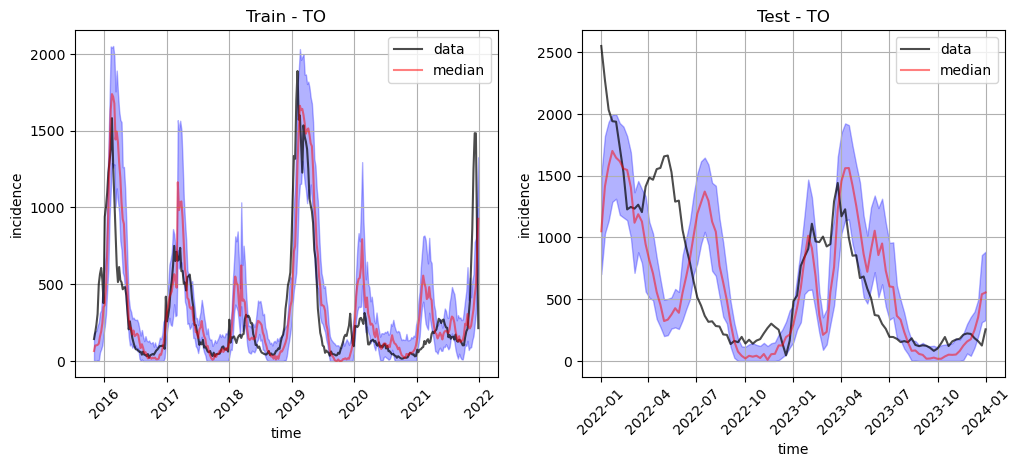

CPU times: user 55.3 s, sys: 3.89 s, total: 59.2 s
Wall time: 41.7 s


In [12]:
%%time 

metrics3 = apply_model(city, ini_date = '2015-06-01', 
                    end_date = end_date, look_back = LOOK_BACK, end_train_date = '2021-12-31', batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= f'dengue_{city}',
                    model_name = f'trained_{city}_dengue_cl2_p_5', 
                    filename = f'../data/dengue_{city}.csv.gz', plot = True)

In [12]:
metrics1

,0,1,2,3,4,5,6,7,8,9
mean_absolute_error,105.650491,107.108107,116.076072,125.377414,137.389677,147.419575,157.042956,166.597343,175.133916,187.670842
explained_variance_score,0.848535,0.838742,0.815593,0.790438,0.757355,0.724847,0.695991,0.666647,0.633508,0.574476
mean_squared_error,33709.198820,35315.985438,40319.372024,45909.287794,53076.663230,60021.232021,66537.053615,72940.525944,80649.942692,93567.520540
mean_squared_log_error,0.233585,0.249062,0.274153,0.299956,0.379757,0.422548,0.642307,0.767201,0.620034,0.631088
median_absolute_error,53.275720,51.070060,57.175617,60.941195,65.451396,71.499628,74.199594,86.485935,90.765584,98.849904
r2_score,0.845748,0.838346,0.815352,0.789636,0.756655,0.724677,0.694619,0.665108,0.629706,0.570082


In [13]:
metrics2

,0,1,2,3,4,5,6,7,8,9
mean_absolute_error,96.126873,105.680466,115.207076,125.274856,135.332648,147.966714,160.215850,170.906766,177.431656,187.005687
explained_variance_score,0.853345,0.830440,0.811698,0.782719,0.755322,0.728753,0.697899,0.667132,0.645213,0.589318
mean_squared_error,32694.621297,37776.387784,41117.414021,47493.684781,53389.779403,59167.030141,65831.932970,72809.616561,77358.090737,89590.549290
mean_squared_log_error,0.191272,0.199490,0.247163,0.276700,0.311460,0.370818,0.427254,0.528999,0.693462,0.797622
median_absolute_error,48.915018,50.462897,55.595609,58.857189,65.812917,73.039767,81.470995,94.466050,101.597814,109.476888
r2_score,0.850391,0.827084,0.811697,0.782376,0.755219,0.728595,0.697855,0.665709,0.644820,0.588355


In [9]:
metrics3

,0,1,2,3,4,5,6,7,8,9
mean_absolute_error,105.011528,112.975420,127.761377,142.075840,151.952632,162.540867,174.583455,186.090038,203.610444,213.879762
explained_variance_score,0.836014,0.821845,0.799174,0.767226,0.741748,0.699449,0.657679,0.601277,0.529498,0.466278
mean_squared_error,36395.007819,39119.173660,43870.682193,50815.112258,56339.606988,65658.655921,74993.441212,88120.164847,104496.781860,118907.216787
mean_squared_log_error,0.279979,0.326792,0.411041,0.468522,0.499659,0.555856,0.600010,0.635014,0.721594,0.763121
median_absolute_error,62.960215,67.541383,79.875359,88.755272,95.782397,102.489550,110.888722,110.470069,125.113395,131.478552
r2_score,0.833458,0.820937,0.799088,0.767157,0.741695,0.698818,0.655807,0.595414,0.520216,0.453652


In [13]:
metrics3

,0,1,2,3,4,5,6,7,8,9
mean_absolute_error,126.870744,129.161393,123.845862,130.719826,139.679548,157.925717,179.347794,196.445779,202.950264,206.888423
explained_variance_score,0.804483,0.794573,0.787541,0.762338,0.730068,0.687163,0.634971,0.580613,0.556313,0.527829
mean_squared_error,51014.719108,52075.699783,48971.297539,53667.983157,59189.734724,68199.752919,79992.154224,92742.996588,97598.700665,103001.437952
mean_squared_log_error,0.375840,0.363933,0.321562,0.398898,0.509204,1.201952,2.077707,2.220374,1.902900,0.911175
median_absolute_error,61.651734,63.925373,58.203131,61.359319,65.885022,82.528047,104.534508,112.680525,112.279866,109.865686
r2_score,0.766558,0.761631,0.775729,0.754084,0.728628,0.687161,0.632865,0.574189,0.551888,0.526735
